In [2]:
# max-pooling 
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
%matplotlib inline
st = time.time()

# data is assumed to be [V_vec I_vec C_vec]

# change the file name if using a different system
data = np.loadtxt(os.path.expanduser('~/quantum-ml/data/var_K_I_V_1000_3_10meV.txt'))

# data randomly permuted to improve learning rate
data = np.random.permutation(data)
n_tot = data.shape[0]
n_train = int(0.8*n_tot)
n_test = n_tot - n_train

# input parameters
n_inp = int(data.shape[1]/3)
n_out = int(data.shape[1]/3)
print("Number of inputs:", n_inp)
print("Number of outputs:", n_out)

x_train_data = data[:n_train,n_inp:2*n_inp].reshape((n_train,n_inp))
y_train_data = data[:n_train,2*n_inp:].reshape((n_train,n_out)).astype(int)
x_test_data = data[n_train:,n_inp:2*n_inp].reshape((n_test,n_inp))
y_test_data = data[n_train:,2*n_inp:].reshape((n_test,n_out)).astype(int)

print("Total, Training, Test")
print(n_tot, n_train, n_test)



Number of inputs: 100
Number of outputs: 100
Total, Training, Test
1000 800 200


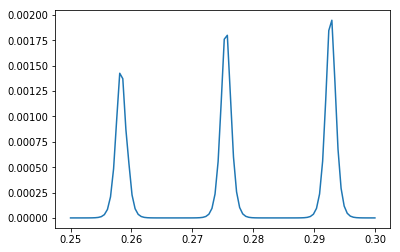

In [9]:
plt.plot(data[0,:n_inp],data[4,n_inp:2*n_inp])

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


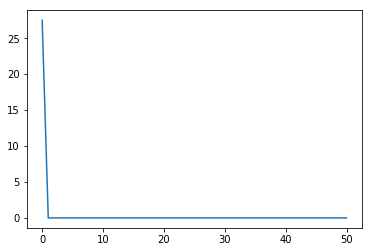

In [47]:
# pooling
x = tf.placeholder(tf.float32, [None, n_inp,1])

y = tf.nn.pool(x,window_shape=[10],pooling_type="MAX",padding="SAME")

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

output = sess.run([y],{x:x_train_data.reshape((-1,n_inp,1))})

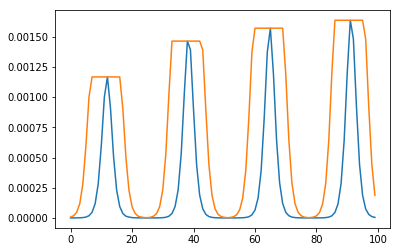

In [48]:
plt.plot(x_train_data[67,:n_inp])
plt.plot(output[0][67][:])

In [57]:
# softmax
x = tf.placeholder(tf.float32, [None, n_inp])

y = tf.nn.softmax(x)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

output = sess.run([y],{x:x_train_data})

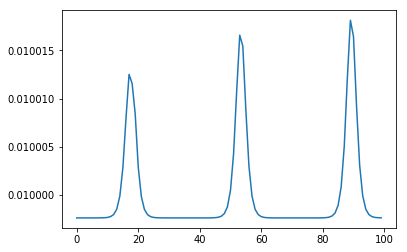

In [60]:
#plt.plot(x_train_data[0,:n_inp])
plt.plot(output[0][0][:])